In [4]:
# Importing necessary libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('properties(1).csv')

# dropping irrelevant columns
df = df.drop(['Description', 'Link'], axis=1)

df = df.drop(['Car Space', 'Condominum Name'], axis=1)

# 1. Identify the row(s) with missing coordinates
missing_coords_df = df[df['Longitude'].isnull() | df['Latitude'].isnull()]

# 2. Check the location name of the missing row(s)
# The output of this will help manually find the correct coordinates
print("Location(s) with missing coordinates:")
print(missing_coords_df[['Location', 'Longitude', 'Latitude']])



Location(s) with missing coordinates:
             Location  Longitude  Latitude
337  Songculan, Dauis        NaN       NaN


In [5]:
# 3. manually fill in the missing coordinates based on external lookup since only 1 row is missing and latitude and longitude needs to be accurate
df.loc[df['Location'] == 'Songculan, Dauis', 'Longitude'] = 123.8294
df.loc[df['Location'] == 'Songculan, Dauis', 'Latitude'] = 9.6291

df.loc[df['Location'] == 'Songculan, Dauis', ['Location', 'Longitude', 'Latitude']]

,Location,Longitude,Latitude
337,"Songculan, Dauis",123.8294,9.6291


In [6]:
from sklearn.cluster import KMeans

# Drop 'Location' if Longitude/Latitude are present
df = df.drop('Location', axis=1)

# Cluster by geographic proximity
kmeans = KMeans(n_clusters=10, random_state=42)
df['Location_Cluster'] = kmeans.fit_predict(df[['Longitude', 'Latitude']])

df.head()

,Category,Sub-Category,Land Size(M2),Building Size(M2),Bedrooms,Bathrooms,Longitude,Latitude,Price(Php),Location_Cluster
0,Condominium,"Condominium,3-bedroom",NaN,128.0,3.0,2.0,121.055300,14.537120,19000000.0,0
1,House,"House,single-family-house",101.0,60.0,3.0,2.0,120.665111,15.169115,3700000.0,7
2,House,"House,single-family-house",100.0,75.0,3.0,2.0,125.534347,7.090939,3790000.0,3
3,Land,"Land,agricutural-lot",6132.0,NaN,NaN,NaN,120.470266,17.430680,3066000.0,5
4,Land,"Land,beach-lot",537.0,NaN,NaN,NaN,121.379905,13.691466,20191200.0,0


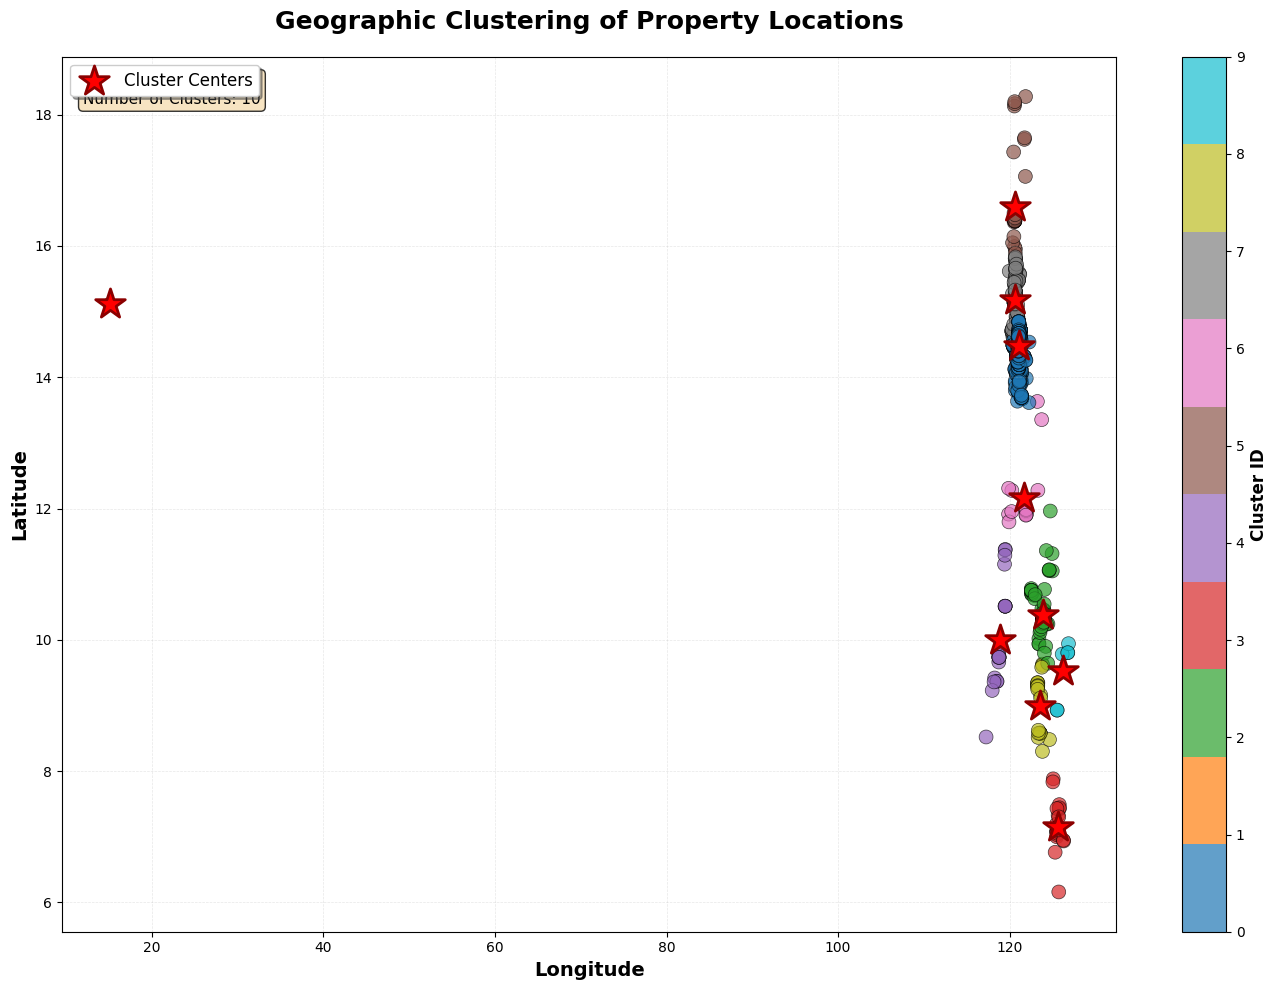


=== Cluster Statistics ===
Total properties analyzed: 3000

Properties per cluster:
  Cluster 0: 2553 properties (85.1%)
  Cluster 1: 1 properties (0.0%)
  Cluster 2: 149 properties (5.0%)
  Cluster 3: 32 properties (1.1%)
  Cluster 4: 23 properties (0.8%)
  Cluster 5: 51 properties (1.7%)
  Cluster 6: 19 properties (0.6%)
  Cluster 7: 143 properties (4.8%)
  Cluster 8: 23 properties (0.8%)
  Cluster 9: 6 properties (0.2%)

Cluster Centers (Longitude, Latitude):
  Cluster 0: (121.04, 14.47)
  Cluster 1: (15.11, 15.11)
  Cluster 2: (123.84, 10.37)
  Cluster 3: (125.61, 7.16)
  Cluster 4: (118.84, 10.00)
  Cluster 5: (120.68, 16.59)
  Cluster 6: (121.66, 12.16)
  Cluster 7: (120.64, 15.17)
  Cluster 8: (123.53, 9.00)
  Cluster 9: (126.27, 9.53)


In [7]:
# Create a larger, higher quality figure
plt.figure(figsize=(14, 10))

# Enhanced scatter plot with better styling
scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                     c=df['Location_Cluster'], 
                     cmap='tab10',  # Better color palette for distinct clusters
                     s=100,  # Larger points
                     alpha=0.7,  # Slight transparency
                     edgecolors='black',  # Black borders for better visibility
                     linewidth=0.5)

# Plot cluster centers with enhanced styling
plt.scatter(kmeans.cluster_centers_[:, 0], 
           kmeans.cluster_centers_[:, 1], 
           c='red', 
           s=500,  # Larger centers
           marker='*',  # Star marker for centers
           edgecolors='darkred',
           linewidth=2,
           label='Cluster Centers',
           zorder=5)  # Ensure centers appear on top

# Enhanced title and labels
plt.title('Geographic Clustering of Property Locations', 
         fontsize=18, 
         fontweight='bold',
         pad=20)
plt.xlabel('Longitude', fontsize=14, fontweight='bold')
plt.ylabel('Latitude', fontsize=14, fontweight='bold')

# Add colorbar to show cluster assignments
cbar = plt.colorbar(scatter, label='Cluster ID')
cbar.set_label('Cluster ID', fontsize=12, fontweight='bold')

# Enhanced legend
plt.legend(fontsize=12, 
          loc='upper left',
          frameon=True,
          shadow=True,
          fancybox=True)

# Improved grid
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# Add cluster statistics as text annotation
n_clusters = len(kmeans.cluster_centers_)
cluster_counts = df['Location_Cluster'].value_counts().sort_index()

stats_text = f"Total Properties: {len(df)}\nNumber of Clusters: {n_clusters}"
plt.text(0.02, 0.98, stats_text,
        transform=plt.gca().transAxes,
        fontsize=11,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Optional: Print cluster statistics
print("\n=== Cluster Statistics ===")
print(f"Total properties analyzed: {len(df)}")
print(f"\nProperties per cluster:")
for cluster_id in sorted(df['Location_Cluster'].unique()):
    count = len(df[df['Location_Cluster'] == cluster_id])
    percentage = (count / len(df)) * 100
    print(f"  Cluster {cluster_id}: {count} properties ({percentage:.1f}%)")

print(f"\nCluster Centers (Longitude, Latitude):")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"  Cluster {i}: ({center[0]:.2f}, {center[1]:.2f})")